## Posttest 6 Kecerdasan Buatan

### Nama : Narupa Rangga Goroguta
### NIM : 2209106004
### Kelas : A1 22

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [8]:
df = pd.read_csv('income.csv')
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,40,Self-emp-not-inc,223881,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,70,United-States,>50K
1,30,Private,149118,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,46,Private,109209,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
3,32,Private,229566,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,60,United-States,>50K
4,54,?,148657,Preschool,1,Married-civ-spouse,?,Wife,White,Female,0,0,40,Mexico,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,40,Private,130834,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
24996,31,Local-gov,33124,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,<=50K
24997,38,Federal-gov,190895,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,?,>50K
24998,23,Private,420973,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K


#### kita cek terlebih dahulu apakah ada nilai null atau tidak

In [9]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

#### kemudian lakukan encoder untuk mengubah dari kategorikal ke numerik

In [13]:
encoder = LabelEncoder()
df['workclass'] = encoder.fit_transform(df['workclass'])
df['education'] = encoder.fit_transform(df['education'])
df['marital.status'] = encoder.fit_transform(df['marital.status'])
df['occupation'] = encoder.fit_transform(df['occupation'])
df['relationship'] = encoder.fit_transform(df['relationship'])
df['race'] = encoder.fit_transform(df['race'])
df['sex'] = encoder.fit_transform(df['sex'])
df['native.country'] = encoder.fit_transform(df['native.country'])
df['income'] = encoder.fit_transform(df['income'])

#### kemudian disini kita menentukan x dan y disini kita menetukan dulu x dari kolom pertama hingga data kedua terakhir sebelum data terakhir sebelum data income, dan y hanya menggunakan kolom terakhir yaitu income

In [15]:
scaler = StandardScaler()

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X = scaler.fit_transform(X)
X

array([[ 0.1016226 ,  1.46149241,  0.32445366, ..., -0.21719211,
         2.36748139,  0.29092446],
       [-0.62903367,  0.08961128, -0.38440738, ..., -0.21719211,
        -0.0314106 ,  0.29092446],
       [ 0.54001636,  0.08961128, -0.76280225, ..., -0.21719211,
        -0.0314106 ,  0.29092446],
       ...,
       [-0.04450866, -1.96821042,  0.01169882, ..., -0.21719211,
        -0.0314106 , -4.7197401 ],
       [-1.14049306,  0.08961128,  2.19317002, ..., -0.21719211,
        -0.0314106 ,  0.29092446],
       [ 1.56293513,  0.08961128, -0.96337267, ..., -0.21719211,
        -0.0314106 ,  0.29092446]])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train.shape

(20000, 14)

#### kemudian kita mengecek dahulu berapa record dan kolom, kemudian jumlah kolom nya akan jadi banyak input di DNN

In [18]:
model = Sequential([
    layers.Dense(16, activation='relu', input_shape=[14]),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [19]:
print(X_train.shape)
print(y_train.shape)

(20000, 14)
(20000,)


In [20]:
mf = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
500/500 [==============================] - 5s 6ms/step - loss: 0.4297 - accuracy: 0.8037 - val_loss: 0.3600 - val_accuracy: 0.8382
Epoch 2/100
500/500 [==============================] - 3s 5ms/step - loss: 0.3464 - accuracy: 0.8396 - val_loss: 0.3389 - val_accuracy: 0.8490
Epoch 3/100
500/500 [==============================] - 2s 5ms/step - loss: 0.3337 - accuracy: 0.8446 - val_loss: 0.3306 - val_accuracy: 0.8535
Epoch 4/100
500/500 [==============================] - 3s 5ms/step - loss: 0.3278 - accuracy: 0.8469 - val_loss: 0.3248 - val_accuracy: 0.8537
Epoch 5/100
500/500 [==============================] - 3s 5ms/step - loss: 0.3244 - accuracy: 0.8470 - val_loss: 0.3251 - val_accuracy: 0.8535
Epoch 6/100
500/500 [==============================] - 2s 5ms/step - loss: 0.3221 - accuracy: 0.8472 - val_loss: 0.3248 - val_accuracy: 0.8512
Epoch 7/100
500/500 [==============================] - 3s 5ms/step - loss: 0.3207 - accuracy: 0.8496 - val_loss: 0.3221 - val_accuracy: 0.8570

In [21]:
model.evaluate(X_test, y_test)

157/157 [==============================] - 1s 3ms/step - loss: 0.3348 - accuracy: 0.8462


[0.3347569406032562, 0.8461999893188477]

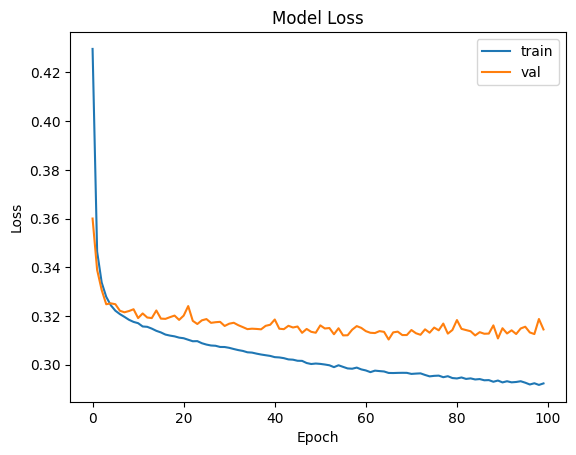

In [22]:
plt.plot(mf.history['loss'], label='train')
plt.plot(mf.history['val_loss'], label='val')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.show()

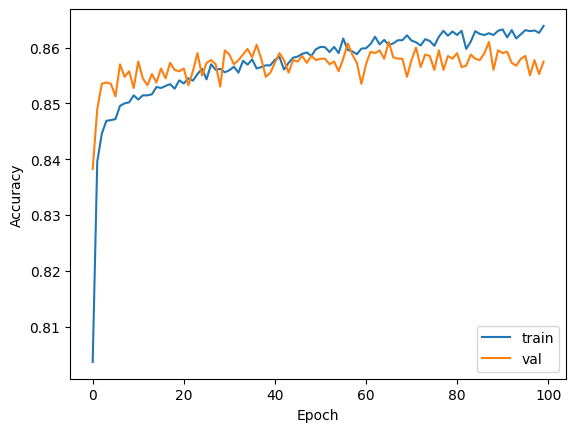

In [23]:
plt.plot(mf.history['accuracy'], label='train')
plt.plot(mf.history['val_accuracy'], label='val')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()